<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/Customer_churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preprocessing

## Import Libraries & Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
ccp_data = pd.read_csv("Churn_Modelling.csv")


## Data Exploration

In [ ]:
ccp_data.head(-5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0


In [ ]:
ccp_data.shape

(10000, 14)

In [ ]:
ccp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#Check categorical columns (Qulitative Values)

ccp_data.select_dtypes(include= "object").columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
len(ccp_data.select_dtypes(include= "object").columns)

3

In [ ]:
#Check numerical columns (Quantitative Values)

ccp_data.select_dtypes(include= ["int64", "float64"]).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
len(ccp_data.select_dtypes(include= ["int64", "float64"]).columns)

11

In [ ]:
# Statistical Summary

ccp_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Dealing With Missing Data and NaN

In [ ]:
# check for missing Data

ccp_data.isnull().values.any()

False

In [ ]:
# Check for number of missing values
ccp_data.isnull().values.sum()

0

In [ ]:
# Checking for NaN values
ccp_data.isna().values.any()

False

## Encode The Categorical Data

In [ ]:
ccp_data.select_dtypes(include= ["object"]).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
# Column's [RowNumber	CustomerId	Surname] have statistical signaificance to the Dependent variable.

ccp_data.head(-5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0


## Dropping Columns

In [ ]:
# Dropping Column's [RowNumber	CustomerId	Surname]

ccp_data_2 =ccp_data.drop(columns= ["RowNumber", "CustomerId",	"Surname"])

In [ ]:
ccp_data_2.head(-5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9990,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0


In [ ]:
# Check the categorical columns again

ccp_data_2.select_dtypes(include= ["object"]).columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
# Check Unique Values in each categorical column

In [ ]:
ccp_data_2["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
ccp_data_2["Gender"].unique()

array(['Female', 'Male'], dtype=object)

## Applying One Hot Encoding On The Categorical Columns

In [ ]:
# Apply Groupby function

ccp_data_2.groupby("Geography").mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [ ]:
ccp_data_2.groupby("Gender").mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [ ]:
# One Hot Encoding

In [ ]:
ccp_data_3x = pd.get_dummies(data= ccp_data_2, drop_first= False)

In [ ]:
ccp_data_3x.head(-5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,714,33,3,35016.60,1,1,0,53667.08,0,0,1,0,0,1
9991,597,53,4,88381.21,1,1,0,69384.71,1,1,0,0,1,0
9992,726,36,2,0.00,1,1,0,195192.40,0,0,0,1,0,1
9993,644,28,7,155060.41,1,1,0,29179.52,0,1,0,0,0,1


In [ ]:
ccp_data_3 = pd.get_dummies(data= ccp_data_2, drop_first= True)

In [ ]:
ccp_data_3.head(-5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9990,714,33,3,35016.60,1,1,0,53667.08,0,1,0,1
9991,597,53,4,88381.21,1,1,0,69384.71,1,0,0,0
9992,726,36,2,0.00,1,1,0,195192.40,0,0,1,1
9993,644,28,7,155060.41,1,1,0,29179.52,0,0,0,1


## Count-Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

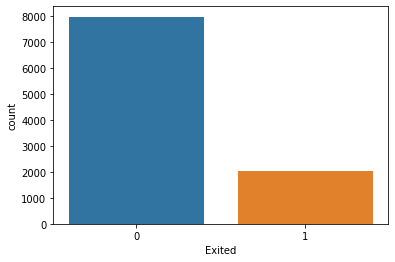

In [ ]:
# Applying on the Dependent Variable

sns.countplot(ccp_data_3["Exited"])
plt.plot()


In [ ]:
# Exact Count Of Customers Staying With the Bank
Ex_count = (ccp_data_3.Exited == 0).sum()

print("The exact number of Customers staying with the Bank is:",Ex_count)

The exact number of Customers staying with the Bank is: 7963


In [ ]:
# Exact Count Of Customers who left the Bank
Exa_count = (ccp_data_3.Exited == 1).sum()

print("The exact number of Customers who left the Bank is:",Exa_count)

The exact number of Customers who left the Bank is: 2037


## Correlation Matrix & Heat Map

In [ ]:
# Droping the Target Variable ( "Exited") which is the dependent variable.

ccp_data_4 = ccp_data_3.drop(columns="Exited")

# "ccp_data_4 are all the independent variables"

## Correlation Matrix

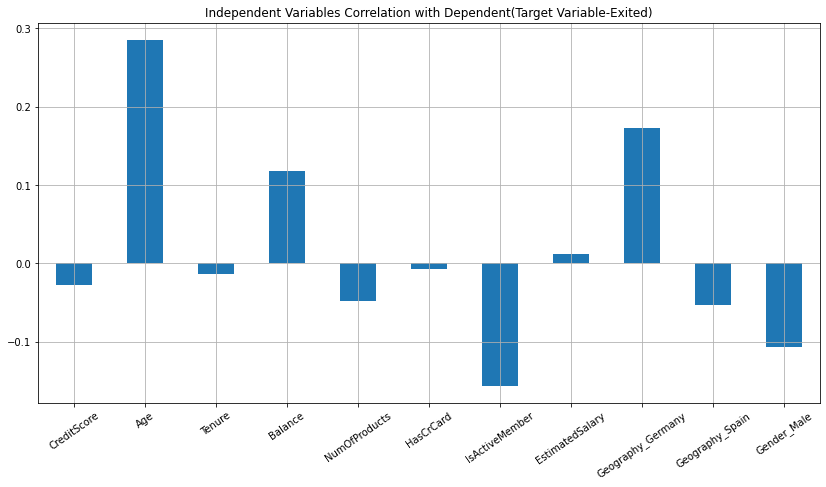

In [ ]:
# Running Correlation all other columns with the target column "Exited"

ccp_data_4.corrwith(ccp_data_3["Exited"]).plot.bar(figsize=(14,7), title= "Independent Variables Correlation with Dependent(Target Variable-Exited)", rot= 35, grid= True

)

## Heat-Map

In [ ]:
# Define a correlation Variable
corr = ccp_data_3.corr()

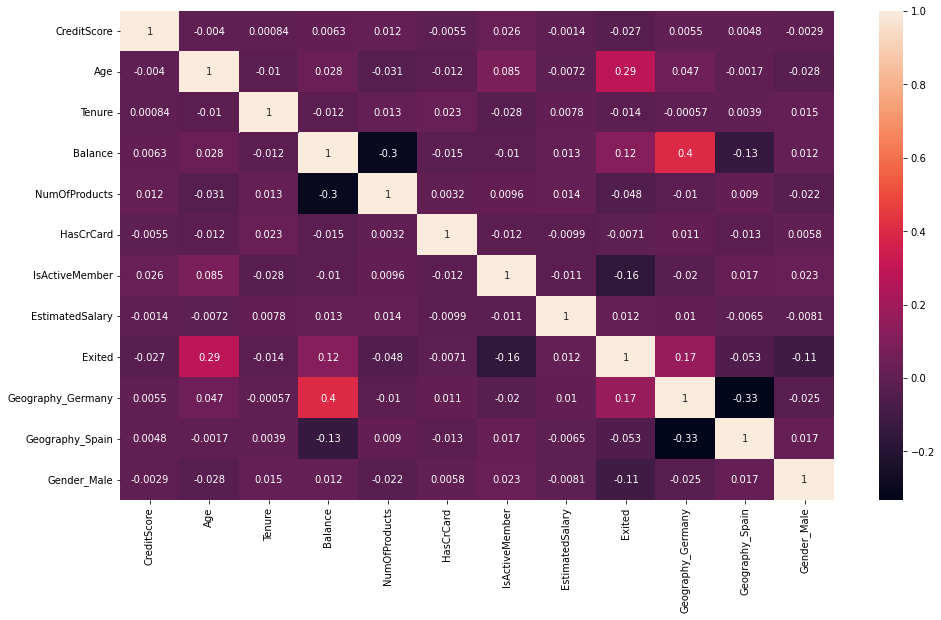

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot= True)

##Dataset Splitting

In [ ]:
ccp_data_3.head(-5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9990,714,33,3,35016.60,1,1,0,53667.08,0,1,0,1
9991,597,53,4,88381.21,1,1,0,69384.71,1,0,0,0
9992,726,36,2,0.00,1,1,0,195192.40,0,0,1,1
9993,644,28,7,155060.41,1,1,0,29179.52,0,0,0,1


In [ ]:
# Matrix of Features

# Droping the Target Variable ( "Exited")-which is the dependent variable.

ccp_data_4 = ccp_data_3.drop(columns="Exited")

# "ccp_data_4 are all the independent variables"

In [ ]:
x = ccp_data_4

In [ ]:
# The (Target)-Dependent Variable.

y = ccp_data_3["Exited"]


In [ ]:
# SPLITTING THE DATA
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,  y_train, y_test = train_test_split (x, y, test_size= 0.2, random_state= 0)

In [ ]:
a= x_train.shape
b= x_test.shape

print(a,b)

(8000, 11) (2000, 11)


In [ ]:
c= y_train.shape
d= y_test.shape

print(c,d)

(8000,) (2000,)


## Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating an Instance of the StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Model Building

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create an instance ( Logistic Regression Classifier)

cl_lr = LogisticRegression(random_state= 0)
cl_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Make the predicitions

y_pred = cl_lr.predict(x_test)

In [ ]:
# Apply the clasification Matrix

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
results_lr = pd.DataFrame([["Logistic Regression", acc, f1, prec, rec]], columns= ["Model", "Accuracy", "F1", "Precision", "Recall"])

In [ ]:
results_lr

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [ ]:
# Get the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


### LR-Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator= cl_lr, X= x_train, y= y_train, cv= 10)

print("Accuracy is {:.2f} %". format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Accuracy is 80.84 %
Standard Deviation is 0.88 %


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create an instance of "RandomForestClassifier"

cl_rf = RandomForestClassifier(random_state= 0)
cl_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Make the predicitions

y_pred = cl_rf.predict(x_test)

In [ ]:
# Apply the clasification Matrix

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
results_rf = pd.DataFrame([["Random Forest", acc, f1, prec, rec]], columns= ["Model", "Accuracy", "F1", "Precision", "Recall"])

In [ ]:
results_rf

,Model,Accuracy,F1,Precision,Recall
0,Random Forest,0.867,0.613372,0.745583,0.520988


In [ ]:
# Apphend model results

results_lr_rf =   results_lr.append(results_rf, ignore_index= True)


In [ ]:
results_lr_rf

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.867,0.613372,0.745583,0.520988


In [ ]:
# Get the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 194  211]]


### RF-Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator= cl_rf, X= x_train, y= y_train, cv= 10)

print("Accuracy is {:.2f} %". format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.02 %


##XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Create an instance of "XGBClassifier" & Train the model

cl_xgb = XGBClassifier()
cl_xgb.fit(x_train, y_train)

XGBClassifier()

In [ ]:
# Make prediction
y_pred = cl_xgb.predict(x_test)

In [ ]:
# Apply the clasification Matrix

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
results_xgb = pd.DataFrame([["XGBoost", acc, f1, prec, rec]], columns= ["Model", "Accuracy", "F1", "Precision", "Recall"])

In [ ]:
results_xgb

,Model,Accuracy,F1,Precision,Recall
0,XGBoost,0.8645,0.605531,0.737589,0.51358


In [ ]:
# Apphend model results

results_lr_rf_xgb = results_lr_rf.append(results_xgb, ignore_index= True)

In [ ]:
results_lr_rf_xgb

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,XGBoost,0.8645,0.605531,0.737589,0.513580


In [ ]:
# Get the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1521   74]
 [ 197  208]]


###XGB-Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator= cl_xgb, X= x_train, y= y_train, cv= 10)

print("Accuracy is {:.2f} %". format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Accuracy is 86.25 %
Standard Deviation is 1.02 %


# Randomized Serach

In [ ]:
# Finding The Best Parameters (XGBoost Classifier)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
para = Parameters = {"learing_rate":[0.05, 0.1, 0.15, 0.20, 0.25, 0.30], "max_depth": [3,4,5,6,7,8,10,12,15], "min_child_weight": [1,3,5,7],
              "gamma": [0.0,0.1,0.2,0.3,0.4], "colsample_bytree": [0.3, 0.4, 0.5, 0.7]

              }

In [ ]:
para

{'learing_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [ ]:
# Define an instance

r_s = RandomizedSearchCV(estimator= cl_xgb, param_distributions= para, n_iter=5, n_jobs= -1, scoring= "roc_auc", cv= 5, verbose= 3)


In [ ]:
r_s.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learing_rate': [0.05, 0.1, 0.15, 0.2,
                                                         0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
# Getting The Best estimators & Parameters

r_s.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.1, learing_rate=0.15, max_depth=6,
              min_child_weight=5)

In [ ]:
r_s.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learing_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [ ]:
r_s.best_score_

0.8633838583540865

# Final Model (XGBoost) Classifier

In [ ]:
# Create a new Classifier = cl and apply all the (best values(r_s.best_estimator_).

from xgboost import XGBClassifier

cl = XGBClassifier()
cl.fit(x_train, y_train)

XGBClassifier()

In [ ]:
cl = XGBClassifier(colsample_bytree=0.4, gamma=0.2, learing_rate=0.15, max_depth=5,
              min_child_weight=3)
cl.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.2, learing_rate=0.15, max_depth=5,
              min_child_weight=3)

In [ ]:
# Evaluate Performace of final Model

# Make prediction
y_pred = cl.predict(x_test)

# Apply the clasification Matrix

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

results_f_xgb = pd.DataFrame([["Final XGBoost", acc, f1, prec, rec]], columns= ["Model", "Accuracy", "F1", "Precision", "Recall"])


In [ ]:
# Apphend model results

results_lr_rf_xgb.append(results_f_xgb, ignore_index= True)

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,XGBoost,0.8645,0.605531,0.737589,0.513580
3,Final XGBoost,0.8655,0.607299,0.742857,0.513580


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 197  208]]


### Final-XGB Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator= cl, X= x_train, y= y_train, cv= 10)

print("Accuracy is {:.2f} %". format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Accuracy is 86.56 %
Standard Deviation is 1.01 %


# Single Observation Predicition

In [ ]:
ccp_data_4.head(-5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9990,714,33,3,35016.60,1,1,0,53667.08,1,0,1
9991,597,53,4,88381.21,1,1,0,69384.71,0,0,0
9992,726,36,2,0.00,1,1,0,195192.40,0,1,1
9993,644,28,7,155060.41,1,1,0,29179.52,0,0,1


In [ ]:
single_obs = [619,	42,	2,	0.00,	1,	1,	1,	101348.88,	0,	0,	0]

In [ ]:
single_obs

[619, 42, 2, 0.0, 1, 1, 1, 101348.88, 0, 0, 0]

In [ ]:
cl.predict(sc.transform(single_obs))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: ignored